<font size="3"> 

<b>Name: Bai Lan
<br>
<br>
August 2021
<br>
<br>
Title: Predictive Modelling with Time Series<b> 

</font>

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
import pandas as pd
import datetime as dt
import math
import pmdarima as pmd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape
from IPython.display import Image
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
data = pd.read_csv('/Users/bailan/data_1995_new.csv')

In [3]:
data.head()

,Date,SP500,Dividend,Earnings,Index,Interest,Price,Time
0,1/1/95,465.25,13.18,31.25,150.30,7.78,744.31,1
1,1/2/95,481.92,13.18,31.90,150.90,7.47,767.92,2
2,1/3/95,493.15,13.17,32.55,151.40,7.20,783.21,3
3,1/4/95,507.91,13.24,33.18,151.90,7.06,804.00,4
4,1/5/95,523.81,13.31,33.80,152.20,6.63,827.54,5


In [4]:
data.head

<bound method NDFrame.head of         Date    SP500  Dividend  Earnings  Index  Interest    Price  Time
0     1/1/95   465.25     13.18     31.25 150.30      7.78   744.31     1
1     1/2/95   481.92     13.18     31.90 150.90      7.47   767.92     2
2     1/3/95   493.15     13.17     32.55 151.40      7.20   783.21     3
3     1/4/95   507.91     13.24     33.18 151.90      7.06   804.00     4
4     1/5/95   523.81     13.31     33.80 152.20      6.63   827.54     5
..       ...      ...       ...       ...    ...       ...      ...   ...
103   1/8/03   989.53     16.45     37.24 184.60      4.45 1,288.92   104
104   1/9/03 1,019.44     16.59     38.58 185.20      4.27 1,323.57   105
105  1/10/03 1,038.73     16.86     41.97 185.00      4.29 1,350.08   106
106  1/11/03 1,049.90     17.12     45.35 184.50      4.30 1,368.29   107
107  1/12/03 1,080.64     17.39     48.74 184.30      4.27 1,409.88   108

[108 rows x 8 columns]>

In [5]:
data.tail(7)

,Date,SP500,Dividend,Earnings,Index,Interest,Price,Time
101,1/6/03,988.00,16.17,34.55,183.70,3.33,"1,293.23",102
102,1/7/03,992.54,16.31,35.89,183.90,3.98,"1,297.76",103
103,1/8/03,989.53,16.45,37.24,184.60,4.45,"1,288.92",104
104,1/9/03,"1,019.44",16.59,38.58,185.20,4.27,"1,323.57",105
105,1/10/03,"1,038.73",16.86,41.97,185.00,4.29,"1,350.08",106
106,1/11/03,"1,049.90",17.12,45.35,184.50,4.30,"1,368.29",107
107,1/12/03,"1,080.64",17.39,48.74,184.30,4.27,"1,409.88",108


In [5]:
data.isnull().sum()

Date        0
SP500       0
Dividend    0
Earnings    0
Index       0
Interest    0
Price       0
Time        0
dtype: int64

In [6]:
index_data = data[['Index','Time']]

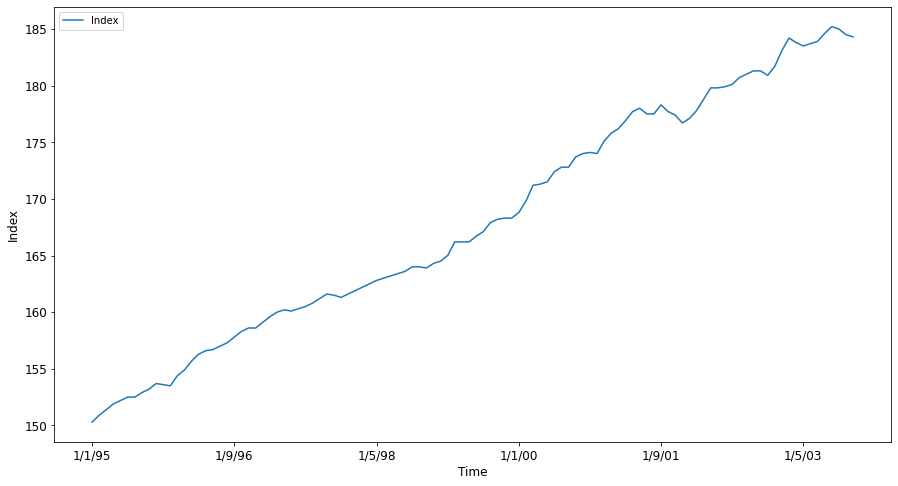

In [7]:
data.plot(x = 'Date', y='Index', figsize=(15, 8), fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Index', fontsize=12)
plt.show()

In [8]:
#utility function: adfuller test, p< 0.05 for stationary series
# def adf(col):
# 	result = adfuller(col, autolag= 'AIC')
# 	print('ADF Statistic: %f' % result[0])
# 	print('p-value: %f' % result[1])
# 	print('Critical Values:')
# 	for key, value in result[4].items():
# 		print('\t%s: %.3f' % (key, value))

In [9]:
# adf(index_data.Index)

ADF Statistic: -0.406678
p-value: 0.908978
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


In [8]:
# ADF Test
result = adfuller(index_data.Index, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    


ADF Statistic: -0.40667764031299486
n_lags: 0.9089778661504999
p-value: 0.9089778661504999
Critial Values:
   1%, -3.5011373281819504
Critial Values:
   5%, -2.8924800524857854
Critial Values:
   10%, -2.5832749307479226


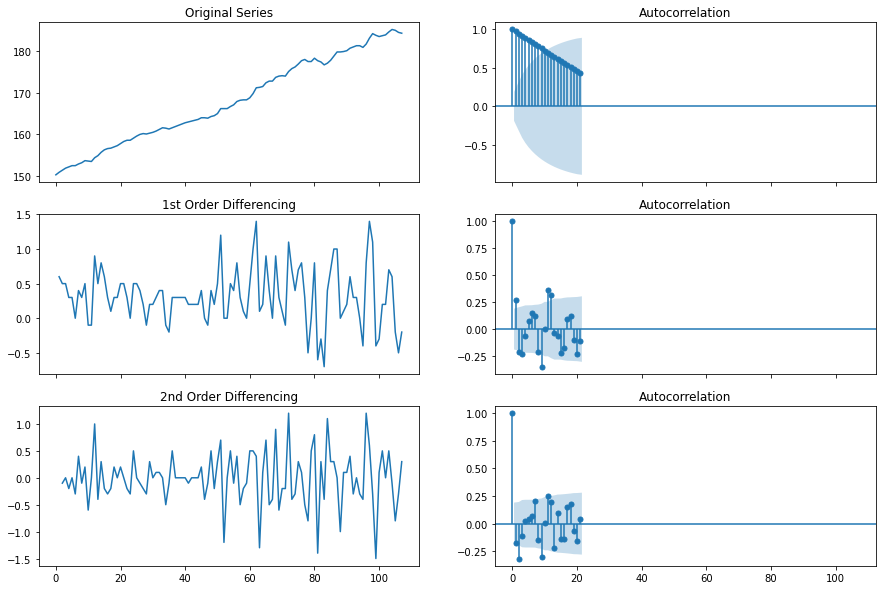

In [10]:
# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15, 10))
# axes[0, 0].plot(index_data.Index); axes[0, 0].set_title('Original Series')
# plot_acf(index_data.Index, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(index_data.Index.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(index_data.Index.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(index_data.Index.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(index_data.Index.diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

In [11]:
# 1st Differencing
# df = index_data.Index.diff().dropna()
# adf(df)

ADF Statistic: -1.792752
p-value: 0.384066
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


In [12]:
# 2nd Differencing: stationary as p-value < 0.05
# df = index_data.Index.diff().diff().dropna()
# adf(df)

ADF Statistic: -3.329007
p-value: 0.013631
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


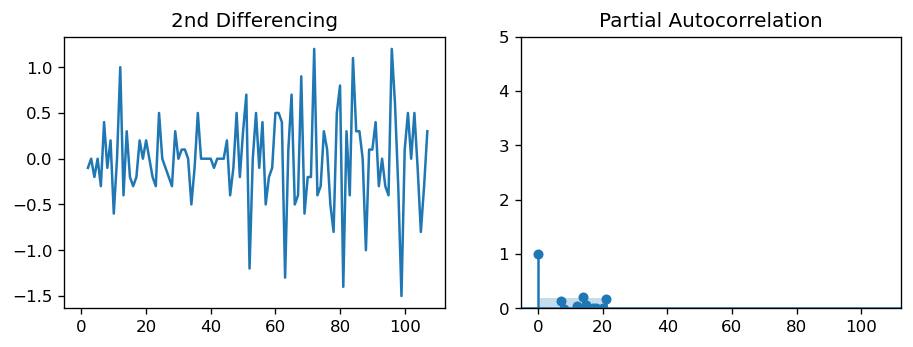

In [13]:
# PACF plot of 2nd differenced series
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(index_data.Index.diff().diff()); axes[0].set_title('2nd Differencing')
# axes[1].set(ylim=(0,5))
# plot_pacf(index_data.Index.diff().diff().dropna(), ax=axes[1])

# plt.show()


In [10]:
train = index_data.Index[:102]
train = pd.DataFrame(train)
train.tail()

,Index
97,183.10
98,184.20
99,183.80
100,183.50
101,183.70


In [11]:
test = index_data.Index[-6 :]
test = pd.DataFrame(test)
test.head(6)

,Index
102,183.90
103,184.60
104,185.20
105,185.00
106,184.50
107,184.30


In [17]:
#utility function
# def auto_arima(timeseriesarray):
#     autoarima_model = pmd.auto_arima(timeseriesarray, 
#                               start_p=1, 
#                               start_q=1,
#                               test="adf",
#                               trace=True)
#     return autoarima_model

In [12]:
#utility function
def auto_arima(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, start_p= 0, d = 1, start_q=0, max_p=5, max_d=2, max_q=5, seasonal=False, stationary=False, test="adf", trace=True)
    return autoarima_model

In [13]:
arima_index_model = auto_arima(train.Index)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=105.001, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=100.802, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=96.605, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=155.826, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=98.058, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=97.081, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=96.230, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=96.097, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=94.180, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=93.093, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=94.123, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=96.119, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=123.551, Time=0.05 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.983 seconds


In [27]:
# arima_index_model

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [14]:
arima_index_model.summary()

# Ljung-Box Prob(Q):	0.79 > 0.05, we can’t reject the null that the errors are white noise.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -42.546
Date:                Sat, 07 Aug 2021   AIC                             93.093
Time:                        16:24:30   BIC                            103.553
Sample:                             0   HQIC                            97.327
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3280      0.049      6.722      0.000       0.232       0.424
ar.L1          0.3166      0.087      3.635      0.000       0.146       0.487
ar.L2         -0.3042      0.095     -3.197      0.001      -0.491      -0.118
sigma2         0.1356      0.016      8.330      0.000       0.104       0.168
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.31
Prob(Q):                              0.79   Prob(JB):                         0.12
Heteroskedasticity (H):               4.18   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


In [20]:
train['ARIMA'] = arima_index_model.predict(len(train))
train

,Index,ARIMA
0,150.30,184.18
1,150.90,184.60
2,151.40,184.92
3,151.90,185.22
4,152.20,185.54
...,...,...
97,183.10,216.44
98,184.20,216.77
99,183.80,217.11
100,183.50,217.44


In [21]:
test['ARIMA'] = arima_index_model.predict(n_periods=)
test

,Index,ARIMA
102,183.90,184.18
103,184.60,184.60
104,185.20,184.92
105,185.00,185.22
106,184.50,185.54
107,184.30,185.88


In [18]:
# mse = mean_squared_error(tt.Index, tt.ARIMA)
# print('MSE: %f' % mse)

MSE: 0.634315


In [27]:
# test_d = pd.read_csv('/Users/bailan/Documents/NUS ISS/Semester1/3. Predictive Analytics/Day 3/Workshop Material/test_data.csv')
# mse = mean_squared_error(test_d.act, test_d.pre)
# print('MSE: %f' % mse)

MSE: 0.634346


In [29]:
mape = mean_absolute_percentage_error(test_d.act, test_d.pre)
print('MSE: %f' % mape)

MSE: 0.003084


In [51]:
# tt.iloc[:,1]

102   183.90
103   184.60
104   185.20
105   185.00
106   184.50
107   184.30
Name: Index, dtype: float64

In [21]:
train['ARIMA'] = arima_index_model.predict(len(train))
train

,Index,ARIMA
0,150.30,184.18
1,150.90,184.60
2,151.40,184.92
3,151.90,185.22
4,152.20,185.54
...,...,...
97,183.10,216.44
98,184.20,216.77
99,183.80,217.11
100,183.50,217.44


In [22]:
arima_index_model

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

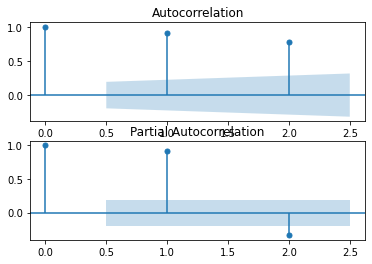

In [31]:
# ACF and PACF plots of forecast residual errors
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
# errors
residuals = [train.iloc[i,0]-train.iloc[i,1] for i in range(len(train))]
residuals = pd.DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, lags=2, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, lags=2, ax=pyplot.gca())
pyplot.show()

In [27]:
from statsmodels.stats.diagnostic import acorr_ljungbox
mod = ARIMA(endog=train, )
res = mod.fit()
jlung = acorr_ljungbox(res.resid)

(array([ 87.36, 152.1 , 203.27, 247.72, 286.52, 318.58, 343.11, 360.15,
       373.43, 386.75, 399.49, 407.32, 409.42, 409.46, 410.3 , 413.03,
       417.11, 423.35, 433.66, 447.78, 463.54, 480.14, 497.23, 514.48,
       535.25, 563.27, 597.89, 631.6 , 661.12, 689.02, 716.26, 742.63,
       766.61, 785.06, 796.66, 804.6 , 813.24, 823.16, 831.81, 837.59]), array([9.03e-021, 9.36e-034, 8.30e-044, 2.01e-052, 7.90e-060, 8.50e-066,
       3.68e-070, 6.16e-073, 6.35e-075, 6.20e-077, 7.85e-079, 1.07e-079,
       2.29e-079, 1.29e-078, 4.72e-078, 6.73e-078, 4.88e-078, 1.22e-078,
       4.26e-080, 2.37e-082, 5.96e-085, 1.00e-087, 1.33e-090, 1.64e-093,
       3.73e-097, 2.64e-102, 7.95e-109, 3.68e-115, 1.27e-120, 9.54e-126,
       9.84e-131, 1.54e-135, 7.58e-140, 5.31e-143, 9.95e-145, 1.07e-145,
       8.15e-147, 3.35e-148, 2.53e-149, 7.47e-150]))


In [62]:
residuals

,0
0,-0.28
1,-0.00
2,0.28
3,-0.22
4,-1.04
5,-1.58
